# Titanic survived Project

# Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Attribute Information

Passenger id- Unique Id of the passenger

Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Survived- Survived (0 = No; 1 = Yes)

Name- Name of the passenger

Sex- Sex of the passenger (Male, Female)

Age- Age of the passenger

Sibsp- Number of Siblings/Spouses Aboard

Parch- Number of Parents/Children Aboard

Ticket- Ticket Number

Fare- Passenger Fare (British pound)

Cabin- Cabin

Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Titanic/titanic_train.csv


In [176]:
# importing necessory libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [177]:
# download data file in local system
data = pd.read_csv(r'C:\Assignements & HW\Internship\project1\titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [178]:
# check information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [179]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [180]:
# Check the  total count
data.Survived.unique()

array([0, 1], dtype=int64)

In [181]:
# Check the  total count
data.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [182]:
data.Sex.unique()

array(['male', 'female'], dtype=object)

In [183]:
data.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [184]:
data.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [185]:
data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [186]:
# Convert categorical data into numerical
data["Embarked"].replace({'S':0,'C':1,'Q':2}, inplace=True)

In [187]:
# Convert categorical data into numerical
data["Sex"].replace({'male':1,'female':2}, inplace=True)

In [188]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0


In [189]:
data["Sex"].value_counts()

1    577
2    314
Name: Sex, dtype: int64

In [190]:
# Fill the NaN using mean and mode 

data['Age']=data['Age'].fillna(data['Age'].mean())
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [191]:
# Check null value 
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [192]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,1.352413,29.699118,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,1.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,2.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,2.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [193]:
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex            0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked       1.543397
dtype: float64

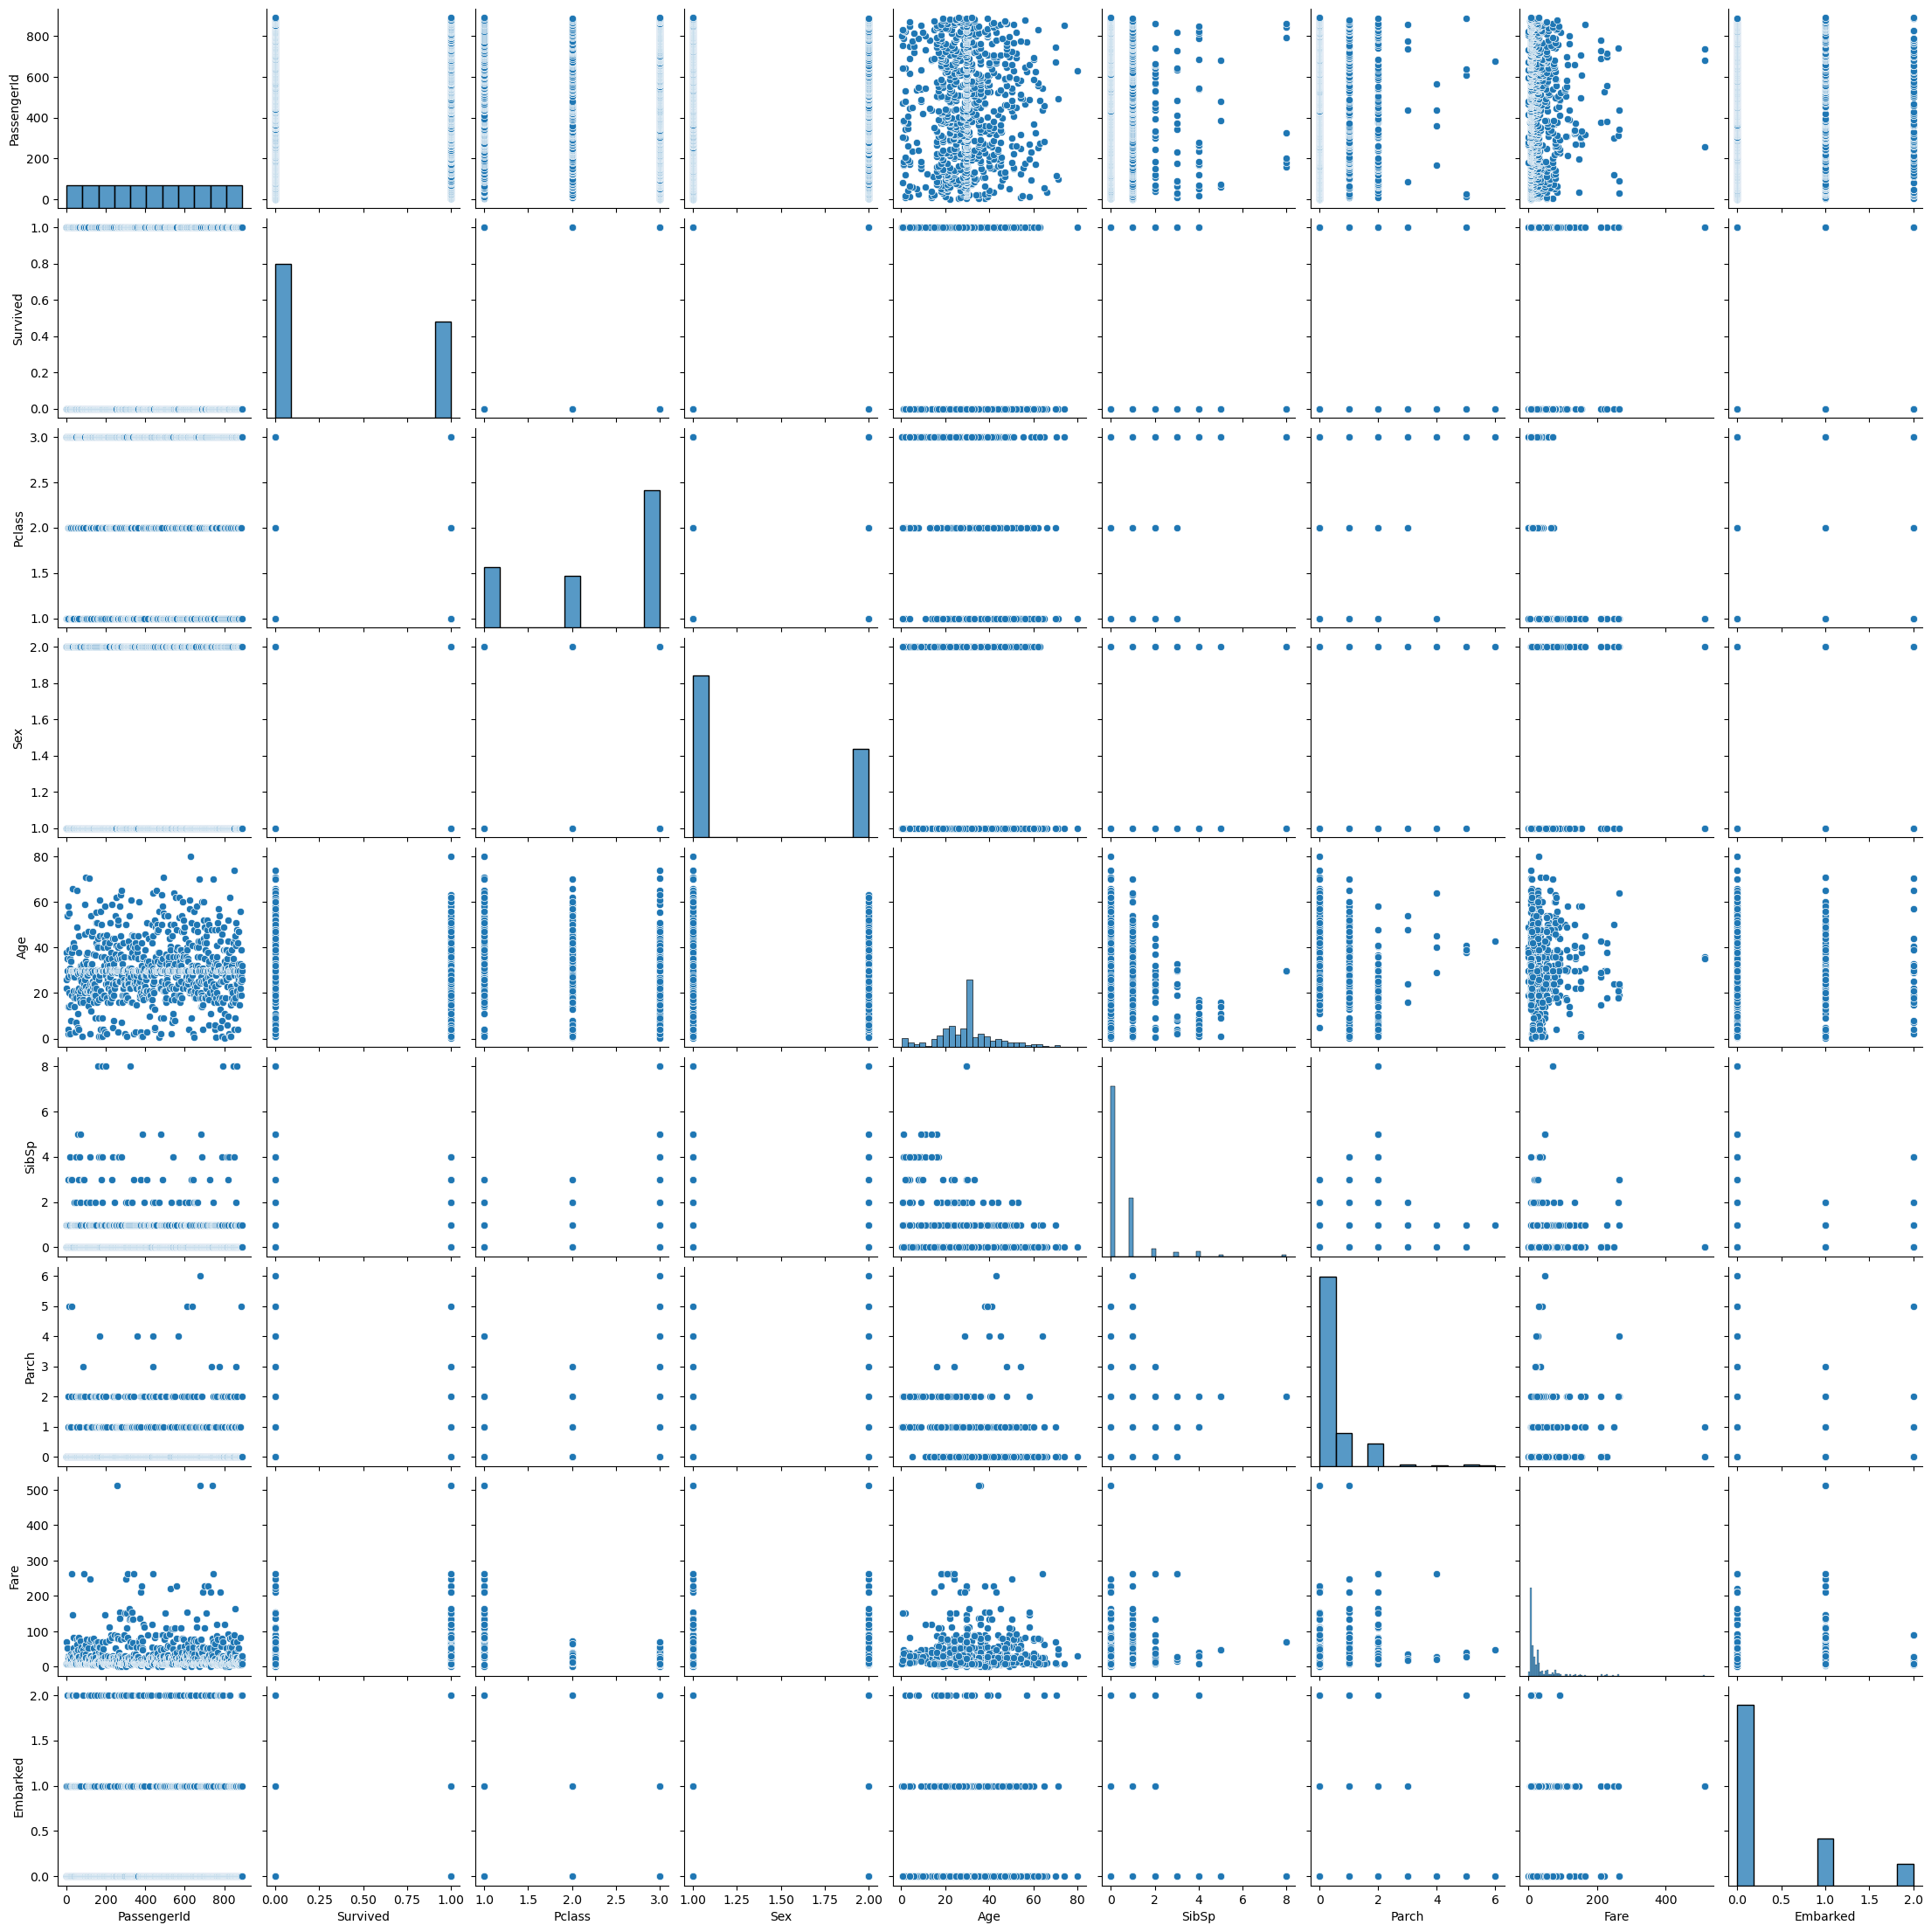

In [194]:
sns.pairplot(data)

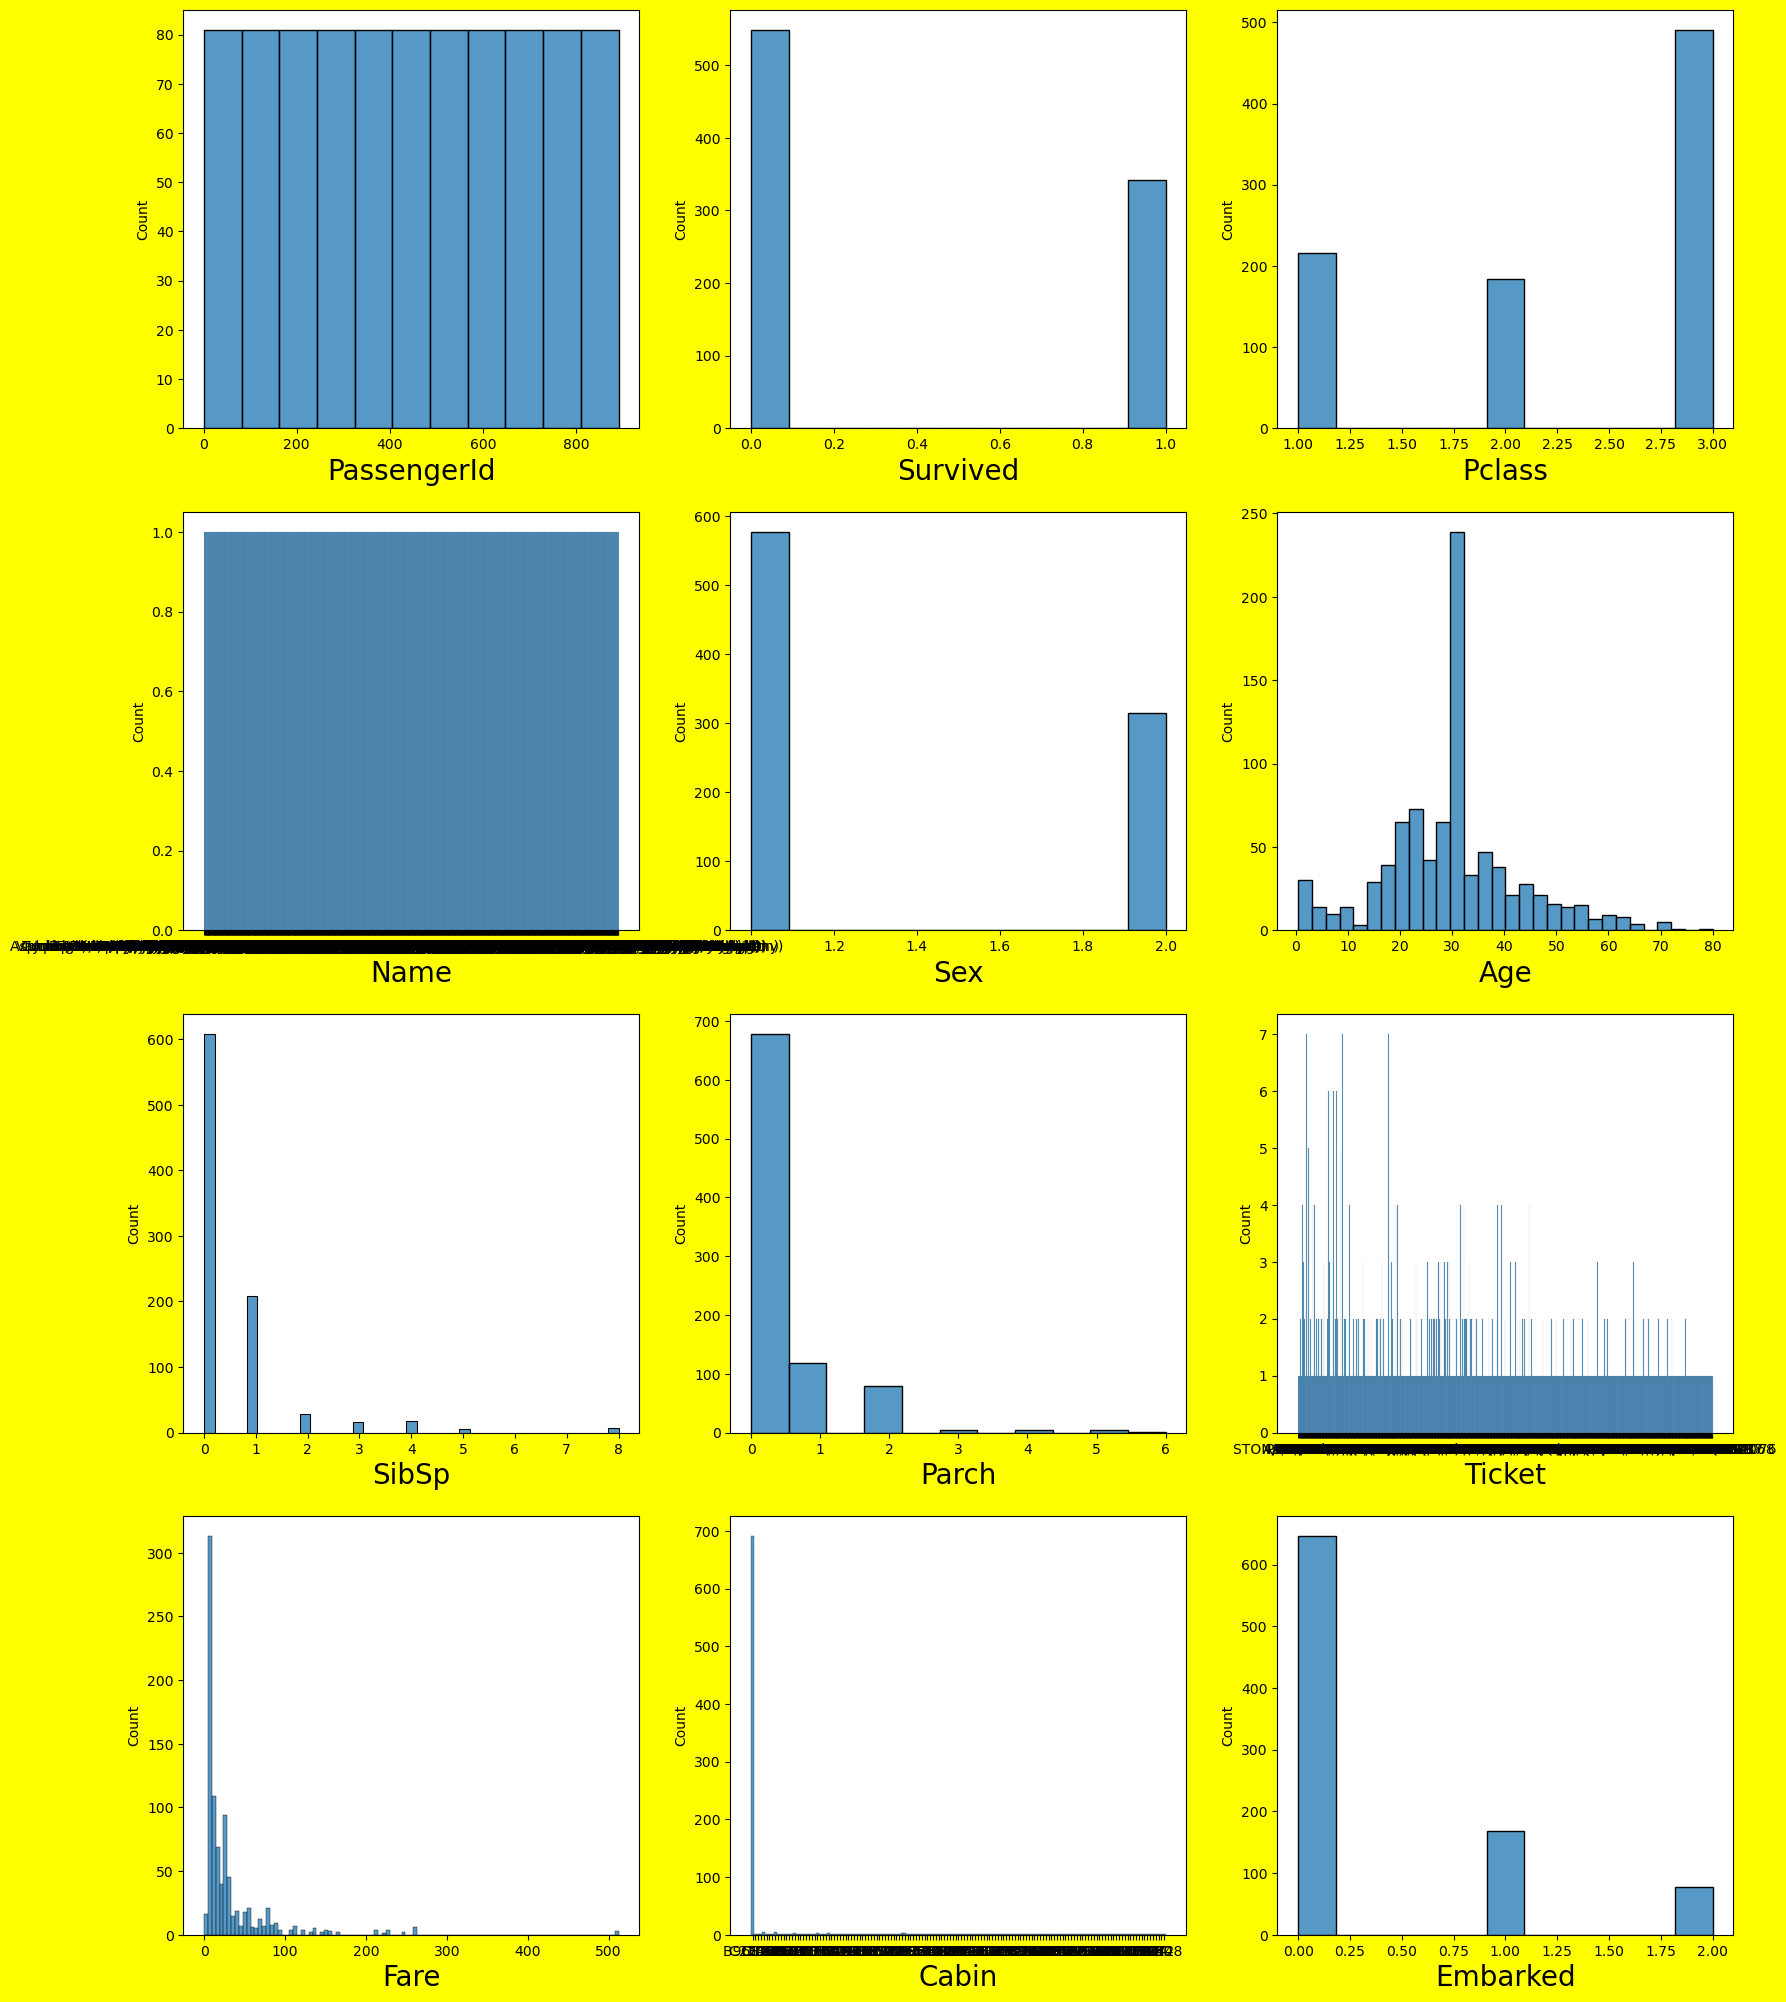

In [195]:
# Let's see how data is distributed for every column 

plt.figure(figsize = (20,25), facecolor = 'yellow')
plotnumber = 1

for column in data:
    if plotnumber <= 12:
        ax = plt.subplot(4,3, plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber += 1
    
plt.show()

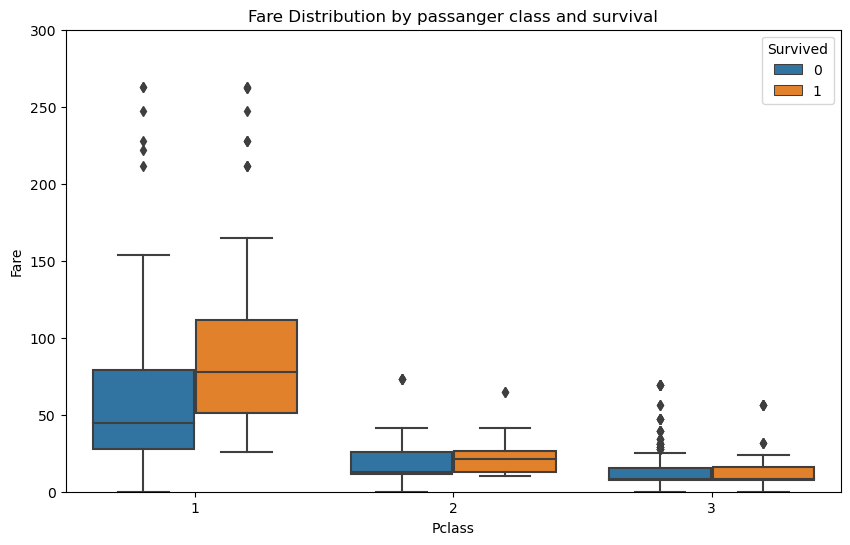

In [196]:
# Check the pclass and fare survived using box plot

plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Pclass',y='Fare', hue='Survived')
plt.ylim(0, 300)
plt.title('Fare Distribution by passanger class and survival')
plt.show()

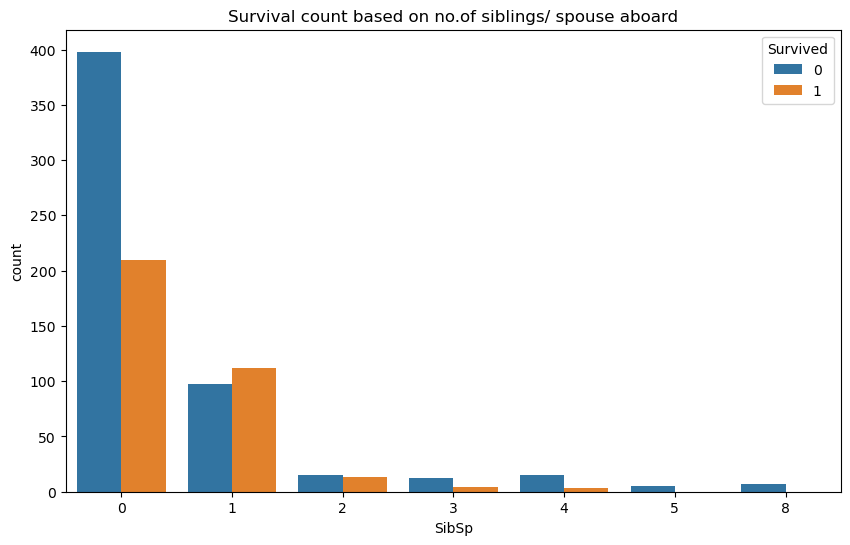

In [197]:
# survival count based on sibling / spouse using countplot 
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='SibSp', hue='Survived')
plt.title('Survival count based on no.of siblings/ spouse aboard')
plt.show()

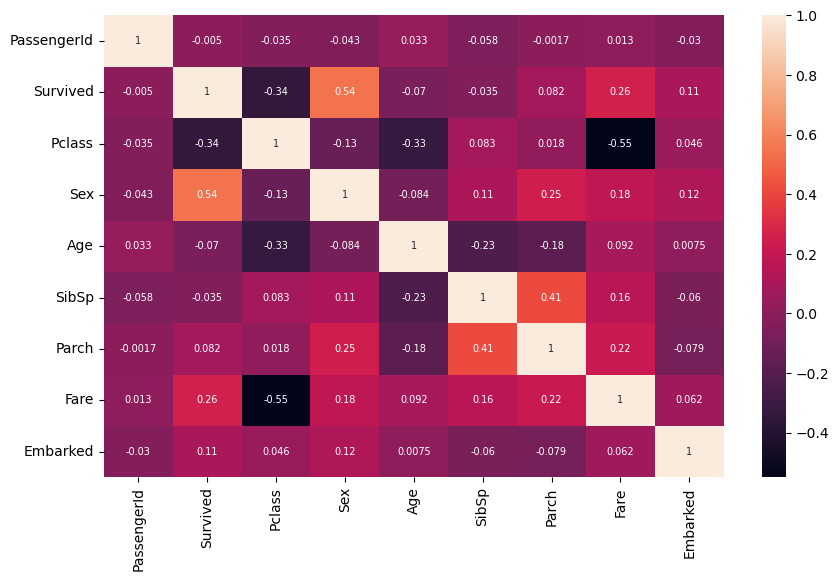

In [198]:
# Plotting Heatmap (Correlation matrix)
df_corr = data.corr() 

plt.figure(figsize=(10,6))
sns.heatmap(df_corr, annot=True, annot_kws={'size':7})
plt.show()

In [199]:
# Drop feature name 
data=data.drop("Name", axis=1)

In [200]:
# Drop feature ticket
data=data.drop("Ticket", axis=1)

In [204]:
data=data.drop("Cabin", axis=1)

In [205]:
x = data.drop("Survived",axis = 1)
y = data["Survived"]


In [206]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Oversampling

In [207]:
from imblearn.over_sampling import SMOTE

SM = SMOTE()

x1, y1 = SM.fit_resample(x,y)

# Modeling

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print(" Best accuracy is ", maxAccu, " At random state ", maxRS)
    

 Best accuracy is  0.8878787878787879  At random state  66


# Creating train test split

In [209]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = maxRS)

In [210]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [211]:
# Checking accuracy for RandomForestClassifier 
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))


0.8432835820895522
[[160  15]
 [ 27  66]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       175
           1       0.81      0.71      0.76        93

    accuracy                           0.84       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.84      0.84       268



# Cross Validation score

In [212]:
from sklearn.model_selection import cross_val_score

# Checking for cv score for Random Forest Classifier 
score = cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predRFC) - score.mean())

[0.52272727 0.61818182 0.44545455 0.75342466 0.42922374]
0.5538024076380241
Difference between Accuracy score and cross validation score is - 0.2894811744515281


# Hyper Parameter Tuning

In [214]:
# Random Forest Classifier 
from sklearn.model_selection import GridSearchCV
parameters = { 'criterion':['gini', 'entropy'],
             'random_state':[10,50,1000],
             'max_depth':[0,10,20],
             'n_jobs':[-2,-1,1],
             'n_estimators':[50,100,200,300]}

In [215]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=5)

In [216]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [217]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 1000}

In [218]:
Final_model = RandomForestClassifier(criterion='entropy',random_state=1000,max_depth=10,n_jobs=-2,n_estimators=100)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

82.83582089552239


# Plotting ROC and compare AUC for all the models used

In [219]:
# Plotting for all the models used here 
from sklearn import datasets
from sklearn import metrics 
from sklearn import model_selection 




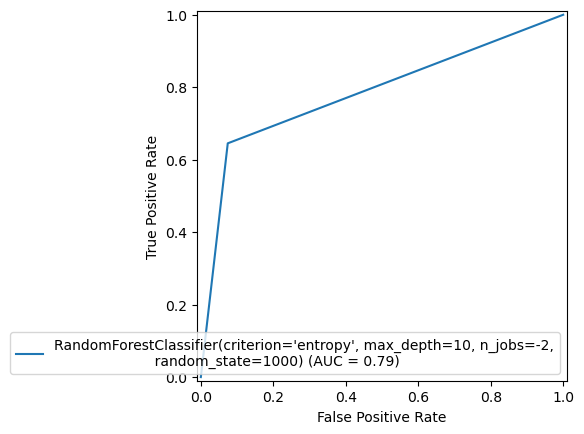

In [220]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = roc_auc, estimator_name = Final_model)
display.plot()

# Saving the Model

In [221]:
# Saving the model using .pkl

import joblib
joblib.dump(Final_model, "Titanic_survived.pkl")

['Titanic_survived.pkl']

# Predicting the saved model

In [222]:
# Let's load the saved model and get the prediction 

model = joblib.load("Titanic_survived.pkl")

# Prediction 

prediction = model.predict(x_test)
prediction

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0], dtype=int64)

In [223]:
a = np.array(y_test)
data = pd.DataFrame()
data["Predicted"]=prediction
data["Original"]=a
data

,Predicted,Original
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
263,0,0
264,1,1
265,0,0
266,0,0
